# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data load

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep ='\t', decimal= ',', encoding = 'utf8', low_memory=False)

print('Nombre de colonnes: ' + str(len(data.columns)))
print('Nombre de lignes: ' + str(len(data)))

Nombre de colonnes: 187
Nombre de lignes: 2012375


# Functions library

## Data

In [3]:
def isNaN(string):
    return string != string
       
# ---------------------------------------------

def DataFilter(df_in, column, string):
    return df_in[ df_in[column].notna() & df_in[column].str.contains(string)]

def DataFilterNA(df_in, column):
    return df_in[ df_in[column].notna() ]

# ---------------------------------------------

def DataFilterInt(df_in, column, integer):
    return df_in[ df_in[column].notna() & df_in[column] == integer]

# ---------------------------------------------

def Drop_column(df, col_name):
    df = df.drop(col_name, 1) 
    return df

# ---------------------------------------------

def Get_coverageRate_ByColumn(df, limit, sup):
    columns = df.columns.values
    count_col_sup = 0
    count_col_inf = 0
    col_list_inf = []
    col_list_sup = []
    
    for column in columns:
        if sup == False:
            if round((1-(len(df) - len(df[column].dropna()))/len(df))*100,3) < limit:
                count_col_inf += 1
                col_list_inf.append(column)
        else:
            if round((1-(len(df) - len(df[column].dropna()))/len(df))*100,3) >= limit:
                count_col_sup += 1
                col_list_sup.append(column)
    
    if sup == False:
        return col_list_inf
    else:
        return col_list_sup

# ---------------------------------------------

def Create_dictionary(df, column, split_char):
    df[column].str.lower()
    unique_rows = df[column].dropna().unique()
    categories_dic = []

    for i in range(0,len(unique_rows)):
        tab = unique_rows[i].split(split_char)
        for j in range(0,len(tab)):
            if not tab[j] in categories_dic:
                categories_dic.append(tab[j])

    categories_dic.sort()
    return categories_dic

# ---------------------------------------------

def revue_Quantitative_Discrete(df, _column):
    # Vérifie les valeurs manquantes
    print('Nombre de valeurs manquantes: ' + str(df[_column].isnull().sum()))
    print('')
    # Affiche les valeurs uniques
    print('Liste des valeurs possibles: ')
    print(df[_column].unique())
    print('')
    # Affiche les mesures
    print('Mesures: ')
    print(df[_column].describe())
    
# ---------------------------------------------

def revue_Quantitative_Continue(_df, _column, _valAberr):
    # Conversion de la colonne
    print('Conversion de la colonne ' + _column + ' au format float')
    _df = _df.astype({_column: 'float'})
    print('')
    
    # Affiche les mesures
    print('Mesures: ')
    print(_df[_column].describe())
    print('')
    
    # Suppression des valeurs aberrantes
    _aberrante=len(_df[_df[_column]>=_valAberr])
    if _aberrante != 0:
        print('Nombre de valeurs aberrantes: ' + str(_aberrante))
        print('Suppression des valeurs aberrantes (> ' + str(_valAberr) + ')')
        _df = _df[(_df[_column].isnull()) | (_df[_column]<_valAberr)]
        print('')
    else:
        print('Pas de valeurs aberrantes')
        print('')
    
    # Test des valeurs manquantes
    _manquante = _df[_column].isnull().sum()
            
    if _manquante != 0:
        print('Nombre de valeurs manquantes: ' + str(_manquante))
        print('Remplacement par la moyenne')
        mean = _df[_column].dropna().mean()
        _df.loc[_df[_column].isnull(),_column] = mean
        print('')
    else:
        print('Pas de valeurs manquantes')
        print('')

    # Vérification
    print('Vérification: ')
    _manquante = _df[_column].isnull().sum()
    print('Nombre de valeurs manquantes: ' + str(_manquante))
    print(_df[_column].describe())
    
    return _df

## Graphs

In [4]:
def HorizontalBarChart(series, y_labels, bar_lenght, bar_width, xlim_min, xlim_max,
                       xlabel, ylabel, title, annotate, _format):
    # Plot the figure.
    plt.figure(figsize=(bar_lenght, bar_width))
    
    ax = series.plot(kind='barh')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_yticklabels(y_labels)
    ax.set_xlim(xlim_min, xlim_max) # expand xlim to make labels easier to read

    rects = ax.patches

    # For each bar: Place a label
    if annotate:
        i = -1
        for rect in rects:
            i += 1

            # Get X and Y placement of label from rect.
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2

            # Number of points between bar and label. Change to your liking.
            space = 5
            # Vertical alignment for positive values
            ha = 'left'

            # If value of bar is negative: Place label left of bar
            if x_value < 0:
                # Invert space to place label to the left
                space *= -1
                # Horizontally align label at right
                ha = 'right'

            # Use X value as label and format number with one decimal place
            label = _format.format(series[i])

            # Create annotation
            plt.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(space, 0),          # Horizontally shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                va='center',                # Vertically center label
                ha=ha)                      # Horizontally align label differently for
                                            # positive and negative values

    plt.show()
    
def VerticalBarChart(_x, _y, df, _xlabel, _ylabel, _title, _format, _Save=False):
    # Defining the plot size
    plt.figure(figsize=(4, 4))

    # Defining the values for x-axis, y-axis
    # and from which dataframe the values are to be picked
    plots = sns.barplot(x=_x, y=_y, data=df)
 
    # Iterrating over the bars one-by-one
    for bar in plots.patches:

      # Using Matplotlib's annotate function and
      # passing the coordinates where the annotation shall be done
      # x-coordinate: bar.get_x() + bar.get_width() / 2
      # y-coordinate: bar.get_height()
      # free space to be left to make graph pleasing: (0, 8)
      # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), _format),
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, -10),
                     textcoords='offset points')

    # Setting the label for x-axis
    plt.xlabel(_xlabel, size=14)

    # Setting the label for y-axis
    plt.ylabel(_ylabel, size=14)

    # Setting the title for the graph
    plt.title(_title)
    
    if _Save:
        plt.gcf().savefig('PSanté_01_notebooknettoyage_' + _title, dpi=100)

    # Finally showing the plot
    plt.show()

## Nutri_score

In [5]:
def nutri_score_calculation(df):
    negative_points = 0
    energy_points = 0
    sugar_points = 0
    fat_points = 0
    sodium_points = 0
              
    positive_points = 0
    vegies_points = 0
    fiber_points = 0
    protein_points = 0 
    
    score_final = 0
    
    if not isNaN(df['nutriscore_score']):
        return df['nutriscore_score']
    else:
        # Points pour l'énergie
        if not isNaN(df['energy_100g']):
            if float(df['energy_100g']) <= 335:
                energy_points = 0
            elif float(df['energy_100g']) > 335:
                negative_points = 1
            elif float(df['energy_100g']) > 670:
                energy_points = 2
            elif float(df['energy_100g']) > 1005:
                energy_points = 3
            elif float(df['energy_100g']) > 1340:
                energy_points = 4
            elif float(df['energy_100g']) > 1675:
                energy_points = 5
            elif float(df['energy_100g']) > 2010:
                energy_points = 6
            elif float(df['energy_100g']) > 2345:
                energy_points = 7
            elif float(df['energy_100g']) > 2680:
                energy_points = 8
            elif float(df['energy_100g']) > 3015:
                energy_points = 9
            else:
                energy_points = 10
        else:
            return float('NaN') # Calcul impossible
            
        # Points pour le sucre
        if not isNaN(df['sugars_100g']):
            if float(df['sugars_100g']) <= 0:
                sugar_points = 0
            elif float(df['sugars_100g']) <= 1.5:
                sugar_points = 1
            elif float(df['sugars_100g']) <= 3:
                sugar_points = 2
            elif float(df['sugars_100g']) <= 4.5:
                sugar_points = 3
            elif float(df['sugars_100g']) <= 6:
                sugar_points = 4
            elif float(df['sugars_100g']) <= 7.5:
                sugar_points = 5
            elif float(df['sugars_100g']) <= 9:
                sugar_points = 6
            elif float(df['sugars_100g']) <= 10.5:
                sugar_points = 7
            elif float(df['sugars_100g']) <= 12:
                sugar_points = 8
            elif float(df['sugars_100g']) <= 13.5:
                sugar_points = 9
            else:
                sugar_points = 10
        else:
            return float('NaN') # Calcul impossible
            
        # Points pour les graisses
        if not isNaN(df['saturated_fat_100g']):
            if float(df['saturated_fat_100g']) <= 1:
                fat_points = 0
            elif float(df['saturated_fat_100g']) > 1:
                fat_points = 1
            elif float(df['saturated_fat_100g']) > 2:
                fat_points = 2
            elif float(df['saturated_fat_100g']) > 3:
                fat_points = 3
            elif float(df['saturated_fat_100g']) > 4:
                fat_points = 4
            elif float(df['saturated_fat_100g']) > 5:
                fat_points = 5
            elif float(df['saturated_fat_100g']) > 6:
                fat_points = 6
            elif float(df['saturated_fat_100g']) > 7:
                fat_points = 7
            elif float(df['saturated_fat_100g']) > 8:
                fat_points = 8
            elif float(df['saturated_fat_100g']) > 9:
                fat_points = 9
            else:
                fat_points = 10
        else:
            return float('NaN') # Calcul impossible
            
        # Points pour le sodium
        if not isNaN(df['sodium_100g']):
            if float(df['sodium_100g']) <= 90:
                sodium_points = 0
            elif float(df['sodium_100g']) > 90:
                sodium_points = 1
            elif float(df['sodium_100g']) > 180:
                sodium_points = 2
            elif float(df['sodium_100g']) > 270:
                sodium_points = 3
            elif float(df['sodium_100g']) > 360:
                sodium_points = 4
            elif float(df['sodium_100g']) > 450:
                sodium_points = 5
            elif float(df['sodium_100g']) > 540:
                sodium_points = 6
            elif float(df['sodium_100g']) > 630:
                sodium_points = 7
            elif float(df['sodium_100g']) > 720:
                sodium_points = 8
            elif float(df['sodium_100g']) > 810:
                sodium_points = 9
            else:
                sodium_points = 10
        else:
            return float('NaN') # Calcul impossible
            
        # Calcul des points négatifs
        negative_points = energy_points + sugar_points + fat_points + sodium_points
        
        # Points pour les légumes
        # df['fruits-vegetables-nuts-estimate_100g']
        if not isNaN(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']):
            if float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) <= 40:
                vegies_points = 0
            elif float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) > 40:
                vegies_points = 1
            elif float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) > 60:
                vegies_points = 2
            elif float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) > 60:
                vegies_points = 3
            elif float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) > 60:
                vegies_points = 4
            elif float(df['fruits_vegetables_nuts_estimate_from_ingredients_100g']) > 80:
                vegies_points = 5
        else:
            return float('NaN') # Calcul impossible
        
        # Points pour les fibres
        if not isNaN(df['fiber_100g']):
            if float(df['fiber_100g']) <= 0.7:
                fiber_points = 0
            elif float(df['fiber_100g']) > 0.7:
                fiber_points = 1
            elif float(df['fiber_100g']) > 1.4:
                fiber_points = 2
            elif float(df['fiber_100g']) > 2.1:
                fiber_points = 3
            elif float(df['fiber_100g']) > 2.8:
                fiber_points = 4
            elif float(df['fiber_100g']) > 3.5:
                fiber_points = 5
        else:
            return float('NaN') # Calcul impossible
        
        # Points pour les protéines
        if not isNaN(df['proteins_100g']):
            if float(df['proteins_100g']) <= 1.6:
                protein_points = 0
            elif float(df['proteins_100g']) > 1.6:
                protein_points = 1
            elif float(df['proteins_100g']) > 3.2:
                protein_points = 2
            elif float(df['proteins_100g']) > 4.8:
                protein_points = 3
            elif float(df['proteins_100g']) > 6.4:
                protein_points = 4
            elif float(df['proteins_100g']) > 8:
                protein_points = 5
        else:
            return float('NaN') # Calcul impossible
            
        # Calcul des points positifs
        positive_points = vegies_points + fiber_points + protein_points
        
        # Calcul du score final
        if negative_points < 11:
            score_final = negative_points - positive_points
        else:
            if vegies_points == 5:
                score_final = negative_points - (fiber_points + vegies_points)
            else:
                score_final = negative_points - positive_points
                
        # Renvoi le nutri-score final
        return score_final

In [6]:
def nutriscore_grade(df):
    #nutriscore_score <= -1 - Nutriscore A
    #nutriscore_score <= 2  - Nutriscore B
    #nutriscore_score <= 10 - Nutriscore C
    #nutriscore_score <= 18 - Nutriscore D
    #nutriscore_score > 18  - Nutriscore E

    if df['nutriscore_score'] <= -1:
        return 'a'
    elif df['nutriscore_score'] <= 2:
        return 'b'
    elif df['nutriscore_score'] <= 10:
        return 'c'
    elif df['nutriscore_score'] <= 18:
        return 'd'
    else:
        return 'e'

## Bio_score

In [7]:
def bioscore(df):
    labels = str(df['labels']).lower()
    
    if 'bio' in labels:
        return 'bio'
    elif 'organic' in labels: 
        return 'bio'
    else: 
        return 'non bio'

## Loca_score

In [8]:
def locascore(df):
    liste_pays = ['allemagne', 'autriche', 'belgique', 'bulgarie', 'chypre', 'croatie', 'danemark', 
                  'espagne', 'estonie', 'finlande', 'france', 'grèce', 'grece', 'hongrie', 'irlande',
                  'italie', 'lettonie', 'lituanie', 'luxembourg', 'malte', 'pays-bas', 'pays bas', 
                  'hollande', 'pologne', 'portugal', 'république tchèque', 'republique tcheque',
                  'roumanie', 'slovaquie', 'slovénie', 'suède', 'suede']
    
    list_countries = ['germany', 'austria', 'belgium', 'bulgaria', 'cyprus', 'croatia', 'denmark', 
                      'spain', 'estonia', 'finland', 'france', 'greece', 'hungary', 'ireland', 'italy',
                      'latvia', 'lithuania', 'luxembourg', 'malta', 'netherlands', 'poland', 'portugal', 
                      'czech Republic', 'romania' , 'slovakia', 'slovenia', 'sweden']
    
    # origins_en
    if not isNaN(df['origins_en']):
        field = str(df['origins_en']).lower()
    
        if 'fr' in field:
            return 'France'
        elif 'europ' in field:
            return 'Europe'
        elif any(country in field for country in liste_pays): 
            return 'Europe'
        elif any(country in field for country in list_countries):  
            return 'Europe'
        else: 
            return 'Monde'
    else:
        # labels
        if not isNaN(df['labels']):
            field = str(df['labels']).lower()
    
            if 'fr' in field:
                return 'France'
            elif 'europ' in field:
                return 'Europe'
            elif any(country in field for country in liste_pays): 
                return 'Europe'
            elif any(country in field for country in list_countries):  
                return 'Europe'
            else: 
                return 'Monde'
        else:
            return 'Inconnu'

## Category

In [9]:
def pnns_groups_2_switch(df):
    if df['pnns_groups_2'] == 'unknown':
        return pnns_groups_1_switch(df)
    elif isNaN(df['pnns_groups_2']):
        return pnns_groups_1_switch(df)
    elif df['pnns_groups_2'] == 'Dressings and sauces':
        return 'autre'
    elif df['pnns_groups_2'] == 'One-dish meals':
        return 'plat'
    elif df['pnns_groups_2'] == 'Biscuits and cakes':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Fruits':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Meat':
        return 'plat'
    elif df['pnns_groups_2'] == 'Sweetened beverages':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Cheese':
        return 'autre'
    elif df['pnns_groups_2'] == 'Bread':
        return 'autre'
    elif df['pnns_groups_2'] == 'Fish and seafood':
        return 'plat'
    elif df['pnns_groups_2'] == 'Sweets':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Salty and fatty products': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Fruit juices':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Dried fruits':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Fats': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Dairy desserts':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Milk and yogurt': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Pizza pies and quiches':
        return 'plat'
    elif df['pnns_groups_2'] == 'Legumes':
        return 'plat'
    elif df['pnns_groups_2'] == 'Unsweetened beverages':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Cereals': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Alcoholic beverages':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Nuts':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Appetizers': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Pastries':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Processed meat':
        return 'plat'
    elif df['pnns_groups_2'] == 'Vegetables':
        return 'plat'
    elif df['pnns_groups_2'] == 'Breakfast cereals':
        return 'autre'
    elif df['pnns_groups_2'] == 'Sandwiches':
        return 'plat'
    elif df['pnns_groups_2'] == 'Ice cream':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Soups':
        return 'plat'
    elif df['pnns_groups_2'] == 'Teas and herbal teas and coffees':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Chocolate products':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Potatoes':
        return 'plat'
    elif df['pnns_groups_2'] == 'Artificially sweetened beverages':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Eggs':
        return 'plat'
    elif df['pnns_groups_2'] == 'Plant-based milk substitutes': # !!!
        return 'autre'
    elif df['pnns_groups_2'] == 'Offals':
        return 'plat'
    elif df['pnns_groups_2'] == 'Waters and flavored waters':
        return 'boisson'
    elif df['pnns_groups_2'] == 'Fruit nectars':
        return 'boisson'
    elif df['pnns_groups_2'] == 'pastries':
        return 'dessert'
    elif df['pnns_groups_2'] == 'Pizza pies and quiche':
        return 'plat'
    elif df['pnns_groups_2'] == 'nan':
        return pnns_groups_1_switch(df)

# ---------------------------------------------

def pnns_groups_1_switch(df):
    if df['pnns_groups_1'] == 'unknown':
        return 'inconnu'
    elif isNaN(df['pnns_groups_1']):
        return 'inconnu'
    elif df['pnns_groups_1'] == 'Fat and sauces':
        return 'autre'
    elif df['pnns_groups_1'] == 'Composite foods': # !!!
        return 'autre'
    elif df['pnns_groups_1'] == 'Sugary snacks':
        return 'dessert'
    elif df['pnns_groups_1'] == 'Fruits and vegetables': # !!!
        return 'autre'
    elif df['pnns_groups_1'] == 'Fish Meat Eggs':
        return 'plat'
    elif df['pnns_groups_1'] == 'Beverages':
        return 'boisson'
    elif df['pnns_groups_1'] == 'Milk and dairy products': # !!!
        return 'autre'
    elif df['pnns_groups_1'] == 'Cereals and potatoes': # !!!
        return 'autre'
    elif df['pnns_groups_1'] == 'Salty snacks': # !!!
        return 'autre'
    elif df['pnns_groups_1'] == 'Alcoholic beverages':
        return 'boisson'
    elif df['pnns_groups_1'] == 'sugary-snacks':
        return 'dessert'

## Food-Choose score

In [10]:
def FoodChooseScore(df):
    score_final = 0

    # Points pour le nutriscore_score
    if float(df['nutriscore_score']) <= -1:
        score_final += 10
    elif float(df['nutriscore_score']) <= 2:
        score_final += 8
    elif float(df['nutriscore_score']) <= 10:
        score_final += 5
    elif float(df['nutriscore_score']) <= 18:
        score_final += 4
    else:
        score_final += 3
        
    # Points pour le nova_group
    if float(df['nova_group']) == 1:
        score_final += 10
    elif float(df['nova_group']) == 2:
        score_final += 8
    elif float(df['nova_group']) == 3:
        score_final += 7
    else:
        score_final += 5
        
    # Points pour le loca_score
    if df['loca_score'] == 'France':
        score_final += 15
    elif df['loca_score'] == 'Europe':
        score_final += 10
    else:
        score_final += 5
        
    # Points pour les additifs
    if float(df['additives_n']) <= 3:
        score_final += 20
    elif float(df['additives_n']) <= 7:
        score_final += 8
    else:
        score_final += 2

    # Points pour le bio_score
    if df['bio_score'] == 'bio':
        score_final += 20
    else:
        score_final += 10
        
    # Renvoi le score final
    return score_final

In [11]:
def fc_grade(df):
    #fc_score <= 35 - Nutriscore E
    #fc_score <= 45  - Nutriscore D
    #fc_score <= 55 - Nutriscore C
    #fc_score <= 65 - Nutriscore B
    #fc_score > 65  - Nutriscore A

    if df['fc_score'] <= 35:
        return 'e'
    elif df['fc_score'] <= 45:
        return 'd'
    elif df['fc_score'] <= 55:
        return 'c'
    elif df['fc_score'] <= 65:
        return 'b'
    else:
        return 'a'

# Filtering of French data

## Filling rate

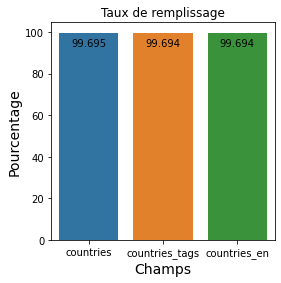

In [12]:
# Création d'un dictionnaire
mydata = {"field": ["countries", "countries_tags", "countries_en"],
        "values": [round((1-(len(data) - len(data['countries'].dropna()))/len(data))*100,3), 
               round((1-(len(data) - len(data['countries_tags'].dropna()))/len(data))*100,3),
               round((1-(len(data) - len(data['countries_en'].dropna()))/len(data))*100,3)]}
 
# Convertion du dictionnaire en dataframe pandas en spécifiant le nom des colonnes 
df = pd.DataFrame(mydata, columns=['field', 'values']) 

# Affichage
VerticalBarChart('field', 'values', df, 'Champs', 'Pourcentage', 'Taux de remplissage', '.3f')

## Number of unique values available per column

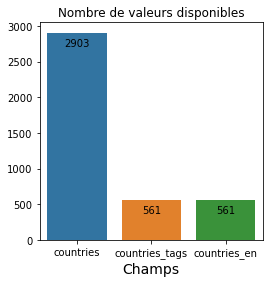

In [13]:
# Création d'un dictionnaire
mydata = {"field": ["countries", "countries_tags", "countries_en"],
          "values": [len(Create_dictionary(data, 'countries', ',')), 
                     len(Create_dictionary(data, 'countries_tags', ',')),
                     len(Create_dictionary(data, 'countries_en', ','))]}
 
# Convertion du dictionnaire en dataframe pandas en spécifiant le nom des colonnes 
df = pd.DataFrame(mydata, columns=['field', 'values']) 

# Affichage
VerticalBarChart('field', 'values', df, 'Champs', '', 'Nombre de valeurs disponibles', '.0f')

## Filtering data

In [14]:
data_france = DataFilter(data, 'countries_en', 'France')

## Deleting columns after filtering

In [15]:
data_france = Drop_column(data_france, 'countries') 
data_france = Drop_column(data_france, 'countries_tags') 
data_france = Drop_column(data_france, 'countries_en')

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 184
Nombre de lignes: 849708


# Processing duplicates

## Same code

In [16]:
data_france.drop_duplicates(subset ='code', keep = 'first', inplace=True)

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 184
Nombre de lignes: 849701


## Same name / brand

In [17]:
data_france.drop_duplicates(subset = ['product_name', 'brands'], keep = 'first', inplace=True)

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 184
Nombre de lignes: 676616


# Columns with filling rate < 25%

## Remove columns

In [18]:
columns_list = Get_coverageRate_ByColumn(data_france, 25, False)

columns_list.remove('fiber_100g')
columns_list.remove('origins_en')

for item in columns_list:
    data_france = Drop_column(data_france, item) 

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 52
Nombre de lignes: 676616


# Columns with filling rate >= 25%

In [19]:
print(data_france.columns)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins_en', 'labels',
       'labels_tags', 'labels_en', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'fruits-vegetables-nuts-esti

## Remove useless columns

In [20]:
Dropped_col_list = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 
                    'last_modified_datetime', 'quantity', 'packaging', 'packaging_tags', 'brands', 
                    'brands_tags', 'categories', 'categories_tags', 'categories_en', 
                    'nutriscore_grade', 'states', 'states_tags', 'states_en', 'main_category', 
                    'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 
                    'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url'
                   ]
  
for item in Dropped_col_list:
    data_france = Drop_column(data_france, item)

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 26
Nombre de lignes: 676616


## Remove redundant columns

In [21]:
Dropped_col_list = ['energy-kcal_100g', 'nutrition-score-fr_100g']
  
for item in Dropped_col_list:
    data_france = Drop_column(data_france, item)

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 24
Nombre de lignes: 676616


## Review of useful columns

In [22]:
data_france = data_france.rename(
    columns={"saturated-fat_100g": "saturated_fat_100g", 
             "fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruits_vegetables_nuts_estimate_from_ingredients_100g",
             "carbon-footprint-from-meat-or-fish_100g": "carbon_footprint_from_meat_or_fish_100g"
            })

### Qualitative variables

#### code

In [23]:
data_france.code.isnull().sum()

0

#### product_name

In [24]:
data_france.product_name.isnull().sum()

2868

In [25]:
data_france = DataFilterNA(data_france, 'product_name')

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 24
Nombre de lignes: 673748


#### labels, labels_tags et labels_en

##### Taux de remplissage

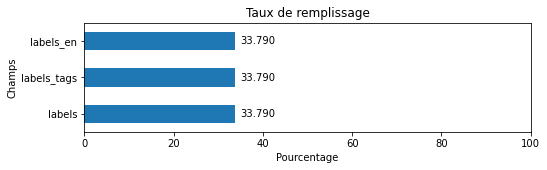

In [26]:
percentages = [round((1-(len(data_france) - len(data_france['labels'].dropna()))/len(data_france))*100,3), 
               round((1-(len(data_france) - len(data_france['labels_tags'].dropna()))/len(data_france))*100,3),
               round((1-(len(data_france) - len(data_france['labels_en'].dropna()))/len(data_france))*100,3),
              ]

series = pd.Series(percentages)

y_labels = ['labels', 'labels_tags', 'labels_en']

HorizontalBarChart(series, y_labels, 8, 2, 0, 100, 
                   'Pourcentage', 'Champs', 'Taux de remplissage', True, "{:.3f}")

##### Analysis of overlapping

In [27]:
data_france.loc[data_france["labels"].isnull(),"labels_tags"].describe()

count                                                     2
unique                                                    1
top       en:carbon-footprint,en:carbon-footprint,en:car...
freq                                                      2
Name: labels_tags, dtype: object

In [28]:
data_france.loc[data_france["labels"].isnull(),"labels_en"].describe()

count                                                     2
unique                                                    1
top       Carbon footprint,Carbon footprint,Carbon footp...
freq                                                      2
Name: labels_en, dtype: object

In [29]:
data_france.loc[data_france["labels_tags"].isnull(),"labels_en"].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: labels_en, dtype: object

In [30]:
data_france['bio_score'] = data_france.apply(bioscore,axis=1)

In [31]:
data_france = Drop_column(data_france, 'labels_tags') 
data_france = Drop_column(data_france, 'labels_en') 

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 23
Nombre de lignes: 673748


#### ingredients_text

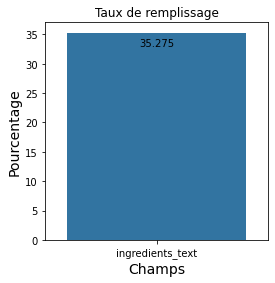

In [32]:
# Création d'un dictionnaire
mydata = {"field": ['ingredients_text'],
        "values": [round((1-(len(data_france) - len(data_france['ingredients_text'].dropna()))/len(data_france))*100,3)]}
 
# Convertion du dictionnaire en dataframe pandas en spécifiant le nom des colonnes 
df = pd.DataFrame(mydata, columns=['field', 'values']) 

# Affichage
VerticalBarChart('field', 'values', df, 'Champs', 'Pourcentage', 'Taux de remplissage', '.3f', True)

In [33]:
data_france = DataFilterNA(data_france, 'ingredients_text')

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 23
Nombre de lignes: 237663


#### origins_en

In [34]:
data_france.origins_en.isnull().sum()

195803

In [35]:
data_france['loca_score'] = data_france.apply(locascore,axis=1)        

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 24
Nombre de lignes: 237663


In [36]:
(data_france.loca_score=='Inconnu').sum()

96229

In [37]:
data_france = data_france[ ~data_france['loca_score'].str.contains('Inconnu') ]

In [38]:
data_france = Drop_column(data_france, 'origins_en')
data_france = Drop_column(data_france, 'labels') 

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 22
Nombre de lignes: 141434


#### pnns_groups_1 & pnns_groups_2

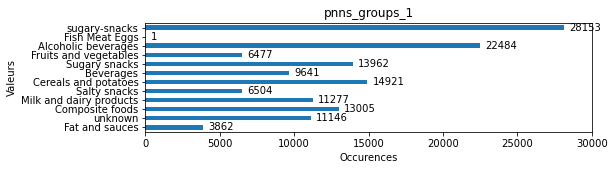

In [41]:
groupby = data_france.groupby('pnns_groups_1').size()

nb_entries = []
for i in range(0,len(groupby)):
    nb_entries.append(groupby[i])
    
series = pd.Series(nb_entries)

y_labels = data_france['pnns_groups_1'].dropna().unique()

HorizontalBarChart(series, y_labels, 8, 2, 0, 30000, 
                   'Occurences', 'Valeurs', 'pnns_groups_1', 
                   True, "{:.0f}")

In [42]:
data_france.pnns_groups_1.isnull().sum()

1

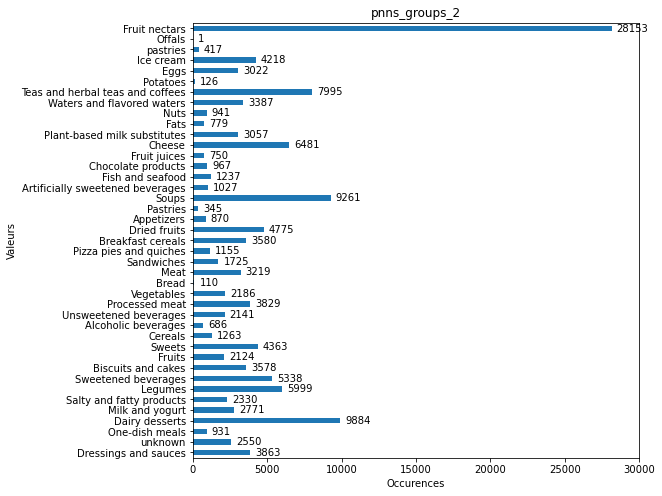

In [44]:
groupby = data_france.groupby('pnns_groups_2').size()

nb_entries = []
for i in range(0,len(groupby)):
    nb_entries.append(groupby[i])
    
series = pd.Series(nb_entries)

y_labels = data_france['pnns_groups_2'].dropna().unique()

HorizontalBarChart(series, y_labels, 8, 8, 0, 30000, 
                   'Occurences', 'Valeurs', 'pnns_groups_2', 
                   True, "{:.0f}")

In [45]:
data_france.pnns_groups_2.isnull().sum()

0

In [46]:
data_france = DataFilterNA(data_france, 'pnns_groups_1')

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 22
Nombre de lignes: 141433


In [47]:
data_france['category'] = data_france.apply(pnns_groups_2_switch,axis=1)

In [48]:
data_france = data_france[ ~data_france['category'].str.contains('inconnu') ]

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 23
Nombre de lignes: 113280


In [49]:
data_france = Drop_column(data_france, 'pnns_groups_1') 
data_france = Drop_column(data_france, 'pnns_groups_2') 

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 21
Nombre de lignes: 113280


### Quantitative variables

#### additives_n

In [50]:
revue_Quantitative_Discrete(data_france, 'additives_n')

Nombre de valeurs manquantes: 0

Liste des valeurs possibles: 
[ 0.  2.  4.  1.  3.  7.  5. 11.  6. 10.  8. 13.  9. 16. 17. 14. 15. 12.
 19. 20. 18. 22. 28. 24. 21. 25.]

Mesures: 
count    113280.000000
mean          1.457071
std           2.264900
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          28.000000
Name: additives_n, dtype: float64


#### ingredients_from_palm_oil_n

In [51]:
revue_Quantitative_Discrete(data_france, 'ingredients_from_palm_oil_n')

Nombre de valeurs manquantes: 0

Liste des valeurs possibles: 
[0. 1. 2.]

Mesures: 
count    113280.000000
mean          0.037288
std           0.192151
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64


#### ingredients_that_may_be_from_palm_oil_n

In [52]:
revue_Quantitative_Discrete(data_france, 'ingredients_that_may_be_from_palm_oil_n')

Nombre de valeurs manquantes: 0

Liste des valeurs possibles: 
[0. 2. 1. 3. 4. 5.]

Mesures: 
count    113280.000000
mean          0.102675
std           0.380038
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64


#### nutriscore_score

In [53]:
data_france.nutriscore_score.isnull().sum()

16375

In [54]:
data_france['nutriscore_score'] = data_france.apply(nutri_score_calculation,axis=1)

In [55]:
data_france.nutriscore_score.isnull().sum()

14475

In [56]:
data_france.nutriscore_score.describe()

count    98805.000000
mean         8.285228
std          8.993541
min        -15.000000
25%          1.000000
50%          7.000000
75%         15.000000
max         40.000000
Name: nutriscore_score, dtype: float64

In [57]:
data_france.nutriscore_score.unique()

array([ 18.,   0.,   2.,  nan,  23.,  11.,  12.,   1.,  14.,   3.,  36.,
        13.,  -7.,  -4.,  -6.,  -5.,   5.,  24.,  25.,  22.,  26.,  21.,
        19., -10.,  17.,  -2.,  -1.,   4.,  -3.,   6.,  16.,   9.,  27.,
        30.,  15.,  20.,  -8.,   8.,  10.,   7.,  28.,  32.,  29.,  -9.,
        31.,  35., -11., -15., -12., -13.,  34., -14.,  33.,  40.,  37.])

In [58]:
median = data_france.nutriscore_score.median()
data_france.loc[data_france.nutriscore_score.isnull(),"nutriscore_score"] = median

In [59]:
data_france.nutriscore_score.isnull().sum()

0

In [60]:
data_france['nutriscore_grade'] = data_france.apply(nutriscore_grade,axis=1)

#### nova_group

In [61]:
revue_Quantitative_Discrete(data_france, 'nova_group')

Nombre de valeurs manquantes: 9931

Liste des valeurs possibles: 
[nan  4.  3.  1.  2.]

Mesures: 
count    103349.000000
mean          3.258812
std           1.032568
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: nova_group, dtype: float64


In [62]:
data_france = DataFilterNA(data_france, 'nova_group')

In [63]:
data_france.nova_group.isnull().sum()

0

#### energy_100g

In [64]:
data_france = revue_Quantitative_Continue(data_france, 'energy_100g', 3700)

Conversion de la colonne energy_100g au format float

Mesures: 
count    9.455800e+04
mean     1.192432e+03
std      2.605681e+04
min      0.000000e+00
25%      4.390000e+02
50%      1.013000e+03
75%      1.648000e+03
max      8.010000e+06
Name: energy_100g, dtype: float64

Nombre de valeurs aberrantes: 484
Suppression des valeurs aberrantes (> 3700)

Nombre de valeurs manquantes: 8791
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102865.000000
mean       1091.838313
std         712.982928
min           0.000000
25%         474.000000
50%        1091.838313
75%        1582.000000
max        3699.000000
Name: energy_100g, dtype: float64


#### fat_100g

In [65]:
data_france = revue_Quantitative_Continue(data_france, 'fat_100g', 101)

Conversion de la colonne fat_100g au format float

Mesures: 
count    94039.000000
mean        13.374310
std         15.762953
min          0.000000
25%          1.400000
50%          7.400000
75%         21.700000
max        100.000000
Name: fat_100g, dtype: float64

Pas de valeurs aberrantes

Nombre de valeurs manquantes: 8826
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102865.000000
mean         13.374310
std          15.071538
min           0.000000
25%           1.700000
50%           9.480000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64


#### saturated_fat_100g

In [66]:
data_france = revue_Quantitative_Continue(data_france, 'saturated_fat_100g', 101)

Conversion de la colonne saturated_fat_100g au format float

Mesures: 
count    93243.000000
mean         5.497070
std          8.232028
min          0.000000
25%          0.300000
50%          2.000000
75%          7.800000
max        400.000000
Name: saturated_fat_100g, dtype: float64

Nombre de valeurs aberrantes: 3
Suppression des valeurs aberrantes (> 101)

Nombre de valeurs manquantes: 9622
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102862.000000
mean          5.489643
std           7.711111
min           0.000000
25%           0.400000
50%           2.600000
75%           6.677500
max         100.000000
Name: saturated_fat_100g, dtype: float64


#### carbohydrates_100g

In [67]:
data_france = revue_Quantitative_Continue(data_france, 'carbohydrates_100g', 101)

Conversion de la colonne carbohydrates_100g au format float

Mesures: 
count    94013.000000
mean        26.495755
std         26.694454
min          0.000000
25%          3.400000
50%         13.900000
75%         51.000000
max        105.000000
Name: carbohydrates_100g, dtype: float64

Nombre de valeurs aberrantes: 2
Suppression des valeurs aberrantes (> 101)

Nombre de valeurs manquantes: 8849
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102860.000000
mean         26.494085
std          25.518291
min           0.000000
25%           4.100000
50%          17.000000
75%          49.000000
max         100.000000
Name: carbohydrates_100g, dtype: float64


#### sugars_100g

In [68]:
data_france = revue_Quantitative_Continue(data_france, 'sugars_100g', 101)

Conversion de la colonne sugars_100g au format float

Mesures: 
count    93596.000000
mean        12.800882
std         18.250049
min          0.000000
25%          0.900000
50%          3.700000
75%         17.500000
max        100.000000
Name: sugars_100g, dtype: float64

Pas de valeurs aberrantes

Nombre de valeurs manquantes: 9264
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102860.000000
mean         12.800882
std          17.408815
min           0.000000
25%           1.000000
50%           4.800000
75%          14.600000
max         100.000000
Name: sugars_100g, dtype: float64


#### fiber_100g

In [69]:
data_france = revue_Quantitative_Continue(data_france, 'fiber_100g', 101)

Conversion de la colonne fiber_100g au format float

Mesures: 
count    53574.000000
mean         2.863248
std          4.146044
min          0.000000
25%          0.500000
50%          1.700000
75%          3.600000
max        100.000000
Name: fiber_100g, dtype: float64

Pas de valeurs aberrantes

Nombre de valeurs manquantes: 49286
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102860.000000
mean          2.863248
std           2.992166
min           0.000000
25%           1.600000
50%           2.863248
75%           2.863248
max         100.000000
Name: fiber_100g, dtype: float64


#### proteins_100g

In [70]:
data_france = revue_Quantitative_Continue(data_france, 'proteins_100g', 101)

Conversion de la colonne proteins_100g au format float

Mesures: 
count    94011.000000
mean         8.045196
std          7.753494
min          0.000000
25%          1.915000
50%          6.100000
75%         11.600000
max        100.000000
Name: proteins_100g, dtype: float64

Pas de valeurs aberrantes

Nombre de valeurs manquantes: 8849
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102860.000000
mean          8.045196
std           7.412477
min           0.000000
25%           2.400000
50%           6.800000
75%          10.900000
max         100.000000
Name: proteins_100g, dtype: float64


#### salt_100g

In [71]:
data_france = revue_Quantitative_Continue(data_france, 'salt_100g', 101)

Conversion de la colonne salt_100g au format float

Mesures: 
count    93358.000000
mean         0.894632
std          2.512987
min          0.000000
25%          0.077500
50%          0.510000
75%          1.200000
max        571.000000
Name: salt_100g, dtype: float64

Nombre de valeurs aberrantes: 2
Suppression des valeurs aberrantes (> 101)

Nombre de valeurs manquantes: 9502
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102858.000000
mean          0.887035
std           1.543933
min           0.000000
25%           0.100000
50%           0.660000
75%           1.100000
max         100.000000
Name: salt_100g, dtype: float64


#### sodium_100g

In [72]:
data_france = revue_Quantitative_Continue(data_france, 'sodium_100g', 101)

Conversion de la colonne sodium_100g au format float

Mesures: 
count    93355.000000
mean         0.355401
std          0.668360
min          0.000000
25%          0.031462
50%          0.204000
75%          0.480000
max         49.987200
Name: sodium_100g, dtype: float64

Pas de valeurs aberrantes

Nombre de valeurs manquantes: 9503
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102858.000000
mean          0.355401
std           0.636737
min           0.000000
25%           0.040000
50%           0.264160
75%           0.440000
max          49.987200
Name: sodium_100g, dtype: float64


#### fruits_vegetables_nuts_estimate_from_ingredients_100g

In [73]:
data_france = revue_Quantitative_Continue(data_france, 'fruits_vegetables_nuts_estimate_from_ingredients_100g', 101)

Conversion de la colonne fruits_vegetables_nuts_estimate_from_ingredients_100g au format float

Mesures: 
count    102073.000000
mean         14.677262
std          38.037372
min           0.000000
25%           0.000000
50%           0.000000
75%          12.500000
max        7022.000000
Name: fruits_vegetables_nuts_estimate_from_ingredients_100g, dtype: float64

Nombre de valeurs aberrantes: 395
Suppression des valeurs aberrantes (> 101)

Nombre de valeurs manquantes: 785
Remplacement par la moyenne

Vérification: 
Nombre de valeurs manquantes: 0
count    102463.00000
mean         13.85076
std          27.47234
min           0.00000
25%           0.00000
50%           0.00000
75%          12.90000
max         100.89000
Name: fruits_vegetables_nuts_estimate_from_ingredients_100g, dtype: float64


# Food-Choose score

In [74]:
data_france['fc_score'] = data_france.apply(FoodChooseScore,axis=1)

In [75]:
data_france['fc_grade'] = data_france.apply(fc_grade,axis=1)

# Saving the dataframe in a csv file

In [76]:
data_france.to_csv('en.openfoodfacts.org.products.filtered.csv', 
                   sep =';', decimal= ',', 
                   encoding = 'utf8', index=False)

print('Nombre de colonnes: ' + str(len(data_france.columns)))
print('Nombre de lignes: ' + str(len(data_france)))

Nombre de colonnes: 24
Nombre de lignes: 102463
